# Portifolio study and optimization



## Importing useful libraries for the project

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime

## Loading historical data

In [9]:
# Checking a random ticked to see what we get
amzn : yf.ticker.Ticker = yf.Ticker("AMZN")

# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
initial_date : str = "2019-07-29"
end_date : str = datetime.today().strftime('%Y-%m-%d')
amzn_hist : pd.core.series.Series= amzn.history(start = initial_date, end = end_date)
amzn_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-29 00:00:00-04:00,96.500000,96.611504,94.527000,95.622498,89864000,0.0,0.0
2019-07-30 00:00:00-04:00,94.556000,95.494499,94.174004,94.926498,58218000,0.0,0.0
2019-07-31 00:00:00-04:00,94.905502,94.977501,92.472000,93.338997,89414000,0.0,0.0
2019-08-01 00:00:00-04:00,93.585999,94.896004,92.200500,92.765999,94266000,0.0,0.0
2019-08-02 00:00:00-04:00,92.253502,92.318001,90.401001,91.162003,99124000,0.0,0.0


### Visualizing the data using CandleSticks

For this plot I put a rough aproximation of where the Corona Virus is located (it is a gross approximation)
    . It is just for reference, it will not impact the rest of the project, but it is interesting to see it

In [17]:
fig = go.Figure(data = [go.Candlestick(x = amzn_hist.index,
                open =amzn_hist['Open'],
                high = amzn_hist['High'],
                low = amzn_hist['Low'],
                close = amzn_hist['Close'])])
fig.update_layout(
    title='Visualizing the historical data using Candlestick',
    yaxis_title='Amazon Stock',
    shapes = [dict(
    x0='2020-04-15', x1='2023-01-01', y0=0, y1=1, xref='x', yref='paper',
    line_width=2)],

    annotations=[dict(
    x='2020-04-15', y=0.05, xref='x', yref='paper',
    showarrow=False, xanchor='left', text='SaRS-Cov period aproximation')])

fig.show()

## Loading different stocks
In the amzn historical DF one has several columns, but the goal here will be to analyse the "Close" column and see it with respect to other stocks

In [51]:
# Create a pd.Dataframe
df_stocks : pd.core.frame.DataFrame = pd.DataFrame()

# modify the df to puth the close values of the selected stocks
def get_stock(dataframe : pd.core.frame.DataFrame, stock_list: list, initial_date : str, end_date : str):

    for i in stock_list:

        stock : yf.ticker.Ticker = yf.Ticker(i)

        # GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
        dataframe[i] : pd.core.series.Series= stock.history(start = initial_date, end = end_date)["Close"]

    return dataframe

initial_date : str = "2017-07-29"
end_date : str = "2022-07-29"
stock_list : list = ['AMZN','GOOGL','WMT','TSLA','META', 'IBM', 'TSCO', 'NVDA', 'MSTF', 'BABA', 'JPM', 'BBD'] 

df = get_stock(df_stocks, stock_list, initial_date, end_date)

df.head()

MSTF: Data doesn't exist for startDate = 1501300800, endDate = 1659067200


,AMZN,GOOGL,WMT,TSLA,META,IBM,TSCO,NVDA,MSTF,BABA,JPM,BBD
Date,,,,,,,,,,,,
2017-07-31 00:00:00-04:00,49.389000,47.275002,71.597137,21.564667,169.250000,103.915672,51.336002,40.143349,NaN,154.949997,77.232323,6.075286
2017-08-01 00:00:00-04:00,49.809502,47.327999,72.053612,21.304667,169.860001,104.368195,51.400043,40.632462,NaN,154.729996,78.267128,6.170014
2017-08-02 00:00:00-04:00,49.794498,47.382000,72.080452,21.726000,169.300003,103.757629,50.933517,40.607746,NaN,151.910004,78.334442,6.268592
2017-08-03 00:00:00-04:00,49.346001,47.014999,72.384827,23.139334,168.589996,104.109596,50.778008,41.124016,NaN,153.320007,77.821228,6.255955
2017-08-04 00:00:00-04:00,49.379002,47.289501,72.035728,23.794001,169.619995,104.267639,52.131847,41.304352,NaN,153.330002,78.797165,6.255955


## Plotting prices and converting it to returns

it is interesting to see the closing price of a stock yet to compare between several stocks it is usual (and more efficient) to compare returns

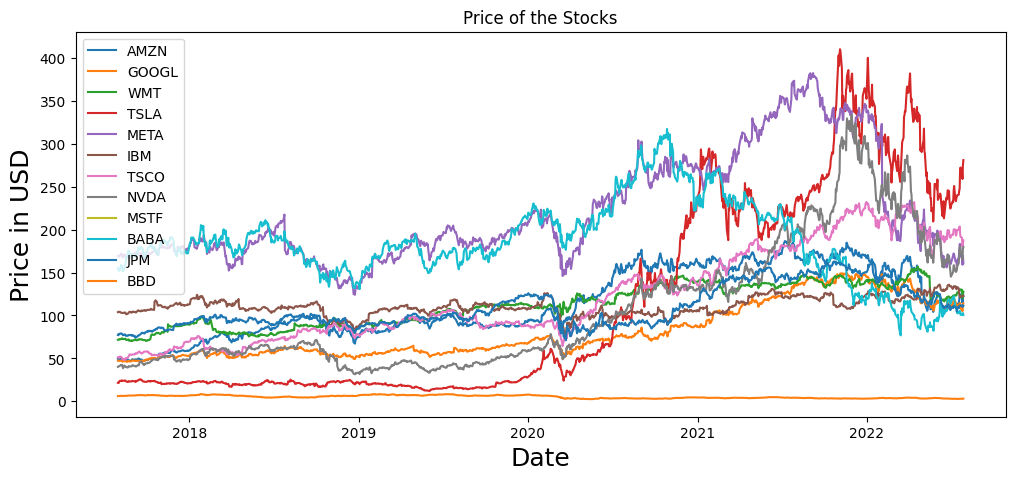

In [52]:
# plot size
plt.figure(figsize=(12,5)) 

# selecting all stocks
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Price of the Stocks')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()